<a href="https://colab.research.google.com/github/ahatesham02/Face-Detection/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/udacity/CVND_Exercises/master/1_2_Convolutional_Filters_Edge_Detection/detector_architectures/haarcascade_frontalface_default.xml

--2021-01-24 16:57:50--  https://raw.githubusercontent.com/udacity/CVND_Exercises/master/1_2_Convolutional_Filters_Edge_Detection/detector_architectures/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-01-24 16:57:50 (22.3 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [ ]:
!wget https://raw.githubusercontent.com/udacity/CVND_Exercises/master/1_2_Convolutional_Filters_Edge_Detection/detector_architectures/haarcascade_eye.xml

--2021-01-24 16:57:50--  https://raw.githubusercontent.com/udacity/CVND_Exercises/master/1_2_Convolutional_Filters_Edge_Detection/detector_architectures/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.02s   

2021-01-24 16:57:50 (14.3 MB/s) - ‘haarcascade_eye.xml.1’ saved [341406/341406]



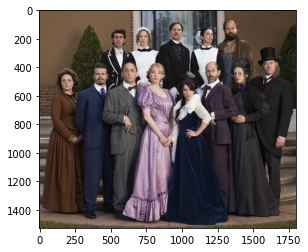

In [ ]:
img= cv2.imread('multi_faces.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

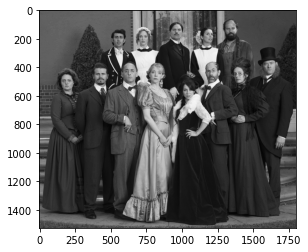

In [ ]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
# load in cascade classifier
face_cascade= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
img_detections = np.copy(img)

In [ ]:
def detect(gray, image):
  faces= face_cascade.detectMultiScale(gray, 2, 5) 
  for x, y, w, h in faces:
        # run the detector on the grayscale image
        # draw next detection as a red rectangle on top of the original image.  
        # Note: the fourth element (255,0,0) determines the color of the rectangle, 
        # and the final argument (here set to 5) determines the width of the drawn rectangle
        cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 3)
        # for eye detection within face rectangle
        ro_gray= gray[y:y+h, x:x+w]
        ro_color= image[y:y+h, x:x+w]
        eyes= eye_cascade.detectMultiScale(ro_gray, 1.1, 3)
        for x1, y1, w1, h1 in eyes:
            cv2.rectangle(ro_color, (x1,y1), (x1+w1, y1+h1), (0,0,255), 2)
  plt.figure(figsize=(25,12))
  plt.imshow(image) 

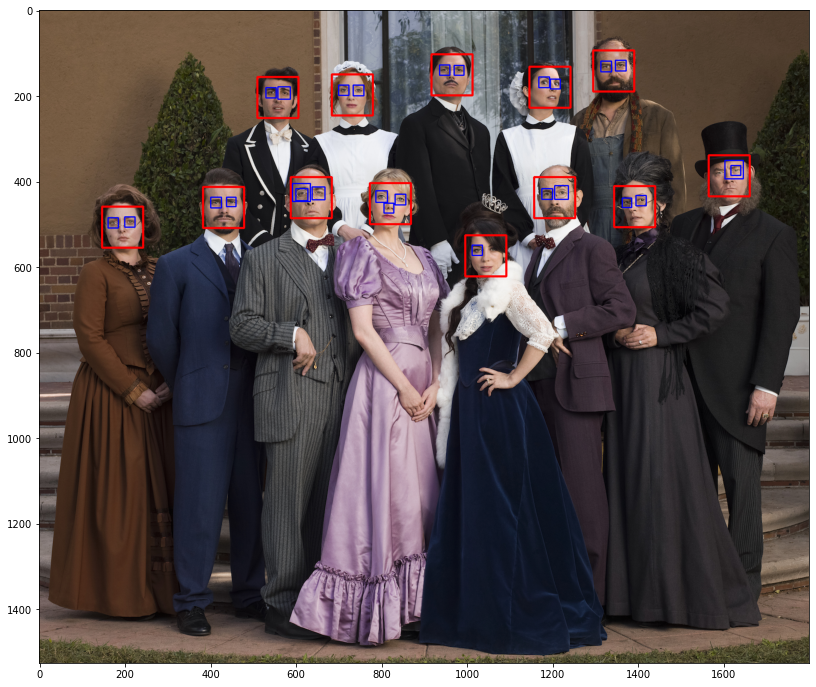

In [ ]:
detect(gray,img_detections)

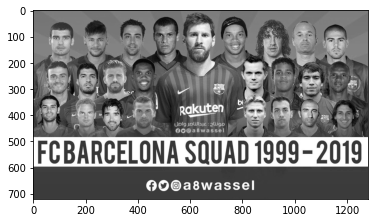

In [ ]:
img2= cv2.imread('barcelona.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

gray2= cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2, cmap='gray')

In [ ]:
img_s= np.copy(img2)

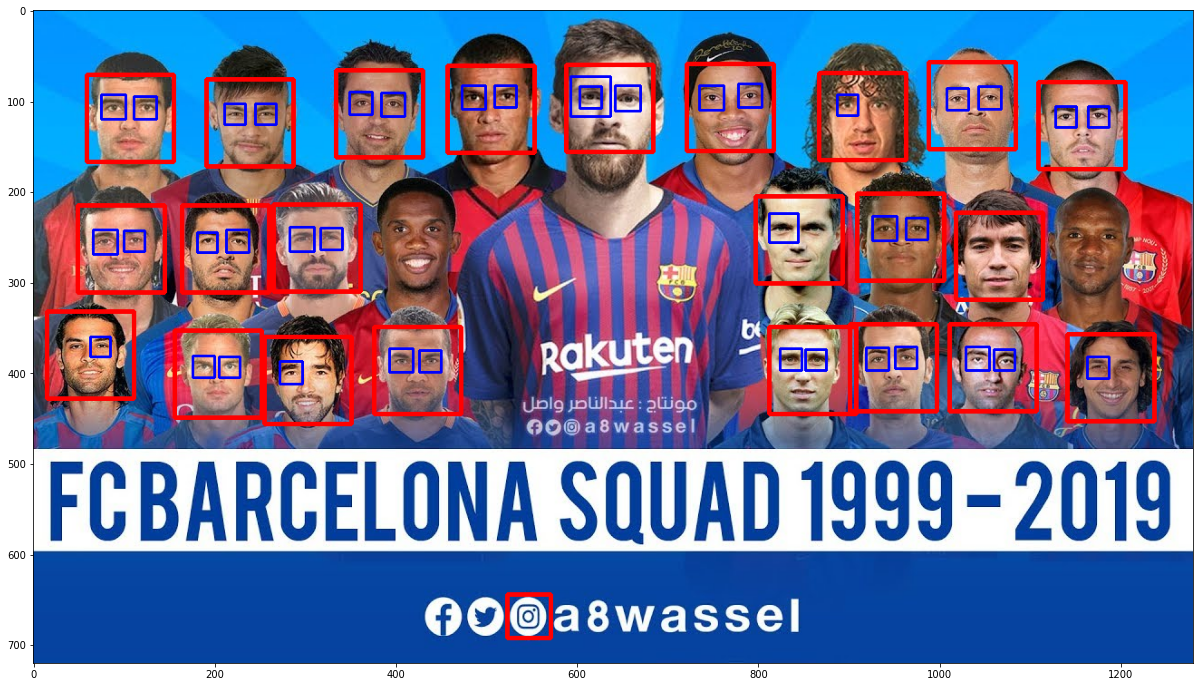

In [ ]:
detect(gray2,img_s)